<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Extraer-datos-relacionados-con-activos" data-toc-modified-id="Extraer-datos-relacionados-con-activos-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Extraer datos relacionados con activos</a></span><ul class="toc-item"><li><span><a href="#Rentabilidad" data-toc-modified-id="Rentabilidad-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Rentabilidad</a></span></li><li><span><a href="#Ratios" data-toc-modified-id="Ratios-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Ratios</a></span></li><li><span><a href="#Broker" data-toc-modified-id="Broker-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Broker</a></span></li><li><span><a href="#Análisis-de-Sentimientos" data-toc-modified-id="Análisis-de-Sentimientos-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Análisis de Sentimientos</a></span></li></ul></li><li><span><a href="#Modelos-de-predicción-de-rendimientos" data-toc-modified-id="Modelos-de-predicción-de-rendimientos-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Modelos de predicción de rendimientos</a></span><ul class="toc-item"><li><span><a href="#Estrategia-Cross-Sectional-Momentum" data-toc-modified-id="Estrategia-Cross-Sectional-Momentum-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Estrategia Cross Sectional Momentum</a></span></li><li><span><a href="#Estrategia-Contrarian" data-toc-modified-id="Estrategia-Contrarian-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Estrategia Contrarian</a></span></li><li><span><a href="#Estrategia-Ranking-por-ratios-fundamentales" data-toc-modified-id="Estrategia-Ranking-por-ratios-fundamentales-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Estrategia Ranking por ratios fundamentales</a></span></li><li><span><a href="#Estrategia-Ranking-por-preferencias-de-analistas" data-toc-modified-id="Estrategia-Ranking-por-preferencias-de-analistas-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Estrategia Ranking por preferencias de analistas</a></span></li><li><span><a href="#Estrategia-Ranking-por-sentimientos" data-toc-modified-id="Estrategia-Ranking-por-sentimientos-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Estrategia Ranking por sentimientos</a></span></li></ul></li><li><span><a href="#Resumen-de-Activos" data-toc-modified-id="Resumen-de-Activos-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Resumen de Activos</a></span></li><li><span><a href="#Rendimiento-de-la-Cartera" data-toc-modified-id="Rendimiento-de-la-Cartera-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Rendimiento de la Cartera</a></span></li><li><span><a href="#Correlaciones" data-toc-modified-id="Correlaciones-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Correlaciones</a></span><ul class="toc-item"><li><span><a href="#Matriz-de-Covarianza" data-toc-modified-id="Matriz-de-Covarianza-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Matriz de Covarianza</a></span></li><li><span><a href="#Matriz-de-Correlación" data-toc-modified-id="Matriz-de-Correlación-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Matriz de Correlación</a></span></li></ul></li><li><span><a href="#Conclusiones" data-toc-modified-id="Conclusiones-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusiones</a></span></li></ul></div>

# Práctica Sesión 7 y 8

Asignatura: Gestión de Activos y Carteras

* Marina Ortín
* Alvaro Muñoz
* Mayra Goicochea

En el presente informe, se realiza la construcción de una cartera de activos según las estrategias de predicción de Rendimientos como: Cross Sectional Momentum, Contrarian, en base a Ranking de Ratios Fundamentales, en base a las estimaciones de calificación de los analistas y con respectoa al análisis de sentimientos de redes como Twitter y Noticias.
La cartera estará comprendida de 175 activos que representan a las empresas con mayor posicionamiento en USA.
Para realizar el análisis, se calcula la Rentabilidad y la Volatilidad anualizada, como también el alpha y beta.

__Librerías__

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as sco
import scipy.stats as scs
from datetime import datetime
plt.style.use('fivethirtyeight')
np.random.seed(777)
import statsmodels.api as sm
from statsmodels import regression

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import warnings
plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category=FutureWarning)

## Extraer datos relacionados con activos
Se extraen los datos de los archivos `dataset.csv`, `dataset_Index.csv` y `data_assets.csv`, dado que son datos generados desde bloomberg, y se guardan en un dataframe:

In [2]:
data_df = pd.read_csv("./source/data_rates.csv", index_col='Unnamed: 0',float_precision='high')
data_df.head()

,Name,Price,Currency,FX Chang,Sector,Country,Rentab 1M,Rentab 3M,Rentab 1Y,Rentab 2Y,...,PX_TO_BOOK_RATIO,PX_TO_CASH_FLOW,EPS_GROWTH,DVD_PAYOUT_RATIO,EQY_REC_CONS,TOT_ANALYST_REC,TOT_BUY_REC,TOT_SELL_REC,TWITTER_SENTIMENT_REALTIME,NEWS_SENTIMENT_RT
NESN SW,NESTLE SA-REG,104.92,CHF,0.9413,Food,SWITZERLAND,0.002101,-0.037608,0.059049,-0.017759,...,5.807045,19.329690,27.976190,61.820922,3.848485,33.0,17.0,3.0,0.000000,0.668758
ROG SW,ROCHE HOLDING AG-GENUSSCHEIN,347.60,CHF,0.9413,Pharmaceuticals,SWITZERLAND,0.035448,0.005205,0.301873,0.024542,...,9.083609,13.630124,28.315704,57.516485,4.321429,28.0,20.0,2.0,0.000000,0.123000
NOVN SW,NOVARTIS AG-REG,82.96,CHF,0.9413,Pharmaceuticals,SWITZERLAND,-0.033326,-0.121187,-0.007774,0.057252,...,3.852521,14.212579,-43.461125,93.041165,4.033333,30.0,18.0,2.0,0.031478,0.101365
BATS LN,BRITISH AMERICAN TOBACCO PLC,3122.00,GBp,1.1211,Agriculture,BRITAIN,0.087426,-0.068755,0.047124,-0.471694,...,1.120697,9.539328,-5.416667,84.612786,4.478261,23.0,18.0,1.0,0.000000,-0.395233
FP FP,TOTAL SA,33.09,EUR,1.0000,Oil&Gas,FRANCE,0.114141,-0.252963,-0.335075,0.054409,...,0.844928,4.351165,-1.343093,69.278807,4.862069,29.0,27.0,0.0,0.000000,0.071835


In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175 entries, NESN SW to TSLA US
Data columns (total 26 columns):
Name                          175 non-null object
Price                         175 non-null float64
Currency                      175 non-null object
FX Chang                      175 non-null float64
Sector                        175 non-null object
Country                       175 non-null object
Rentab 1M                     175 non-null float64
Rentab 3M                     175 non-null float64
Rentab 1Y                     175 non-null float64
Rentab 2Y                     175 non-null float64
Rentab 3Y                     175 non-null float64
Rentab 5Y                     175 non-null float64
Volat 30d                     175 non-null float64
Volat 360d                    175 non-null float64
CUR_MKT_CAP                   175 non-null float64
PE_RATIO                      175 non-null float64
PX_TO_BOOK_RATIO              175 non-null float64
PX_TO_CASH_FLOW            

In [4]:
index_df = pd.read_csv("./source/data_index.csv", index_col='Unnamed: 0')
index_df.index = [datetime.strptime(str(i), '%d/%m/%Y') for i in index_df.index.values]
index_df.head()

,SXXP Index,INDU Index,SX5E Index
2012-04-18,257.71,13032.75,2327.84
2012-04-19,256.51,12964.10,2284.67
2012-04-20,257.79,13029.26,2311.27
2012-04-23,251.75,12927.17,2244.83
2012-04-24,254.37,13001.56,2284.08


In [5]:
index_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2107 entries, 2012-04-18 to 2020-05-14
Data columns (total 3 columns):
SXXP Index    2107 non-null float64
INDU Index    2107 non-null float64
SX5E Index    2107 non-null float64
dtypes: float64(3)
memory usage: 65.8 KB


In [6]:
index_df['SXXP return']=index_df['SXXP Index'].pct_change()
index_df['INDU return']=index_df['INDU Index'].pct_change()
index_df['SX5E return']=index_df['SX5E Index'].pct_change()

In [7]:
val = []
val.append(100)
for i in range(1,index_df.shape[0]):
    val.append(val[i-1]*(1+index_df['SXXP return'].iloc[i]))
index_df['SXXP_Rent'] = val
val = []
val.append(100)
for i in range(1,index_df.shape[0]):
    val.append(val[i-1]*(1+index_df['INDU return'].iloc[i]))  ##Dow Jones
index_df['INDU_Rent'] = val
val = []
val.append(100)
for i in range(1,index_df.shape[0]):
    val.append(val[i-1]*(1+index_df['SX5E return'].iloc[i]))
index_df['SX5E_Rent'] = val

In [8]:
index_df[['SXXP_Rent','INDU_Rent','SX5E_Rent']].head().style.background_gradient(cmap='YlGnBu')

,SXXP_Rent,INDU_Rent,SX5E_Rent
2012-04-18 00:00:00,100,100,100
2012-04-19 00:00:00,99.5344,99.4733,98.1455
2012-04-20 00:00:00,100.031,99.9732,99.2882
2012-04-23 00:00:00,97.6873,99.1899,96.434
2012-04-24 00:00:00,98.704,99.7607,98.1201


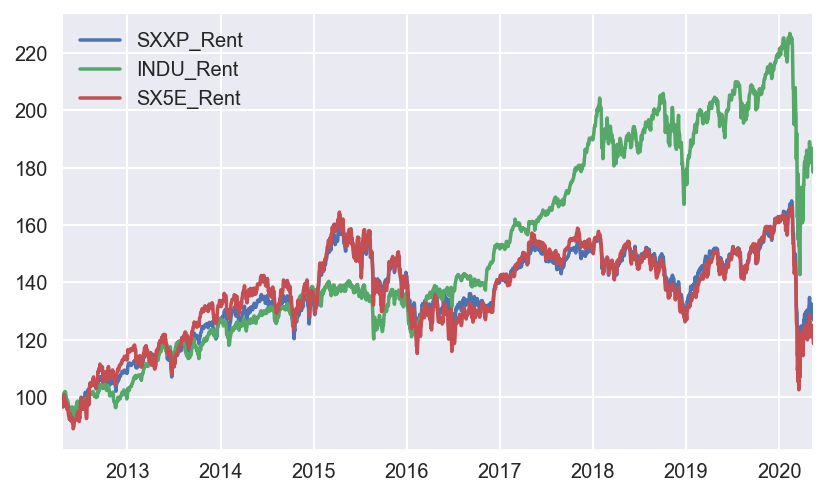

In [9]:
index_df[['SXXP_Rent','INDU_Rent','SX5E_Rent']].plot();

In [10]:
assets_df = pd.read_csv("./source/data_assets.csv", index_col='Unnamed: 0')
assets_df.index = [datetime.strptime(str(i), '%d/%m/%Y') for i in assets_df.index.values]
ass_cols = ['NESN SW','ROG SW','NOVN SW','BATS LN','FP FP','RDSA LN','SAN FP','SIE GY','RDSB LN','BAYN GY','GSK LN','SAP GY','ABI BB','UNA NA','BAS GY','AZN LN','BNP FP','NOVOB DC','DGE LN','KPN NA','DAI GY','MC FP','ULVR LN','DTE GY','RB/ LN','PRU LN','CVX US','OR FP','CS FP','NG/ LN','ASML NA','TEF SQ','AI FP','AIR FP','ABBN SW','PNDORA DC','IMB LN','BN FP','SU FP','DG FP','ZURN SW','CFR SW','ENI IM','IBE SQ','INGA NA','ENEL IM','NDA SS','ADS GY','FRE GY','DPW GY','ORA FP','CPG LN','BT/A LN','STAN LN','BMW GY','NXPI UW','CRH ID','SREN SW','CSGN SW','RI FP','AD NA','WPP LN','SGO FP','AV/ LN','EL FP','BA/ LN','DANSKE DC','COL SM','VOLVB SS','AMS SQ','CON GY','ATCOA SS','HEN3 GY','KER FP','IFX GY','ML FP','ENGI FP','HMB SS','REL LN','SAMPO FH','SWEDA SS','HEIA NA','ASSAB SS','VIV FP','INVEB SS','AKZA NA','EXPN LN','SCAB SS','ERICB SS','HAL US','GLEN LN','FME GY','LGEN LN','G IM','SSE LN','TSCO LN','RNO FP','KBC BB','SEBA SS','EOAN GY','DNB NO','SAND SS','MRK GY','KNEBV FH','CDI FP','CA FP','HEI GY','CMCSA US','ABF LN','SGSN SW','ATCOB SS','RMS FP','ITX SM','HEN GY','UHR SW','TEL NO','SCMN SW','DSY FP','SRG IM','ATL IM','HO FP','TELIA SS','EBS AV','UCB BB','FER SQ','BEI GY','PRY IM','COLOB DC','HEIO NA','TKA GY','EN FP','SCHP SW','ELE SM','KNIN SW','EDP PL','ENG SM','KN FP','RWE GY','PROX BB','UG FP','SCHN SE','BOL FP','CNP FP','EDF FP','RYA ID','GS UN','MMM UN','BA UN','UNH UN','HD UN','AAPL UW','IBM UN','MCD UN','JNJ UN','LDO IM','TRV UN','DIS UN','AMZN US','CAT UN','V UN','JPM UN','PG UN','XOM UN','LYB UN','AXP UN','WMT UN','MSFT UW','MRK UN','NKE UN','VZ UN','KO UN','INTC UW','CSCO UW','PFE UN','TSLA US']


In [11]:
assets_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2107 entries, 2012-04-18 to 2020-05-14
Columns: 175 entries, NESN SW to TSLA US
dtypes: float64(174), int64(1)
memory usage: 2.8 MB


In [12]:
#rentabilidades
for col in assets_df.columns:
    assets_df[col] = assets_df[col].pct_change()

### Rentabilidad

In [13]:
mom_df = data_df[['Rentab 1M','Rentab 3M','Rentab 1Y', 'Rentab 2Y', 'Rentab 3Y', 'Rentab 5Y']]
mom_df.head()

,Rentab 1M,Rentab 3M,Rentab 1Y,Rentab 2Y,Rentab 3Y,Rentab 5Y
NESN SW,0.002101,-0.037608,0.059049,-0.017759,0.182060,0.052315
ROG SW,0.035448,0.005205,0.301873,0.024542,0.094257,0.056073
NOVN SW,-0.033326,-0.121187,-0.007774,0.057252,0.152328,-0.034374
BATS LN,0.087426,-0.068755,0.047124,-0.471694,0.133573,0.122243
FP FP,0.114141,-0.252963,-0.335075,0.054409,-0.003023,0.027513


### Ratios

In [14]:
ratios_df = data_df[['PE_RATIO','PX_TO_BOOK_RATIO','PX_TO_CASH_FLOW', 'EPS_GROWTH',
                     'DVD_PAYOUT_RATIO']]
ratios_df.head()

,PE_RATIO,PX_TO_BOOK_RATIO,PX_TO_CASH_FLOW,EPS_GROWTH,DVD_PAYOUT_RATIO
NESN SW,24.344398,5.807045,19.329690,27.976190,61.820922
ROG SW,22.043812,9.083609,13.630124,28.315704,57.516485
NOVN SW,26.182845,3.852521,14.212579,-43.461125,93.041165
BATS LN,12.501381,1.120697,9.539328,-5.416667,84.612786
FP FP,11.914462,0.844928,4.351165,-1.343093,69.278807


### Broker

In [15]:
brok_df = data_df[['EQY_REC_CONS', 'TOT_ANALYST_REC', 'TOT_BUY_REC', 'TOT_SELL_REC']]
brok_df.head()

,EQY_REC_CONS,TOT_ANALYST_REC,TOT_BUY_REC,TOT_SELL_REC
NESN SW,3.848485,33.0,17.0,3.0
ROG SW,4.321429,28.0,20.0,2.0
NOVN SW,4.033333,30.0,18.0,2.0
BATS LN,4.478261,23.0,18.0,1.0
FP FP,4.862069,29.0,27.0,0.0


### Análisis de Sentimientos

In [16]:
sent_df = data_df[['TWITTER_SENTIMENT_REALTIME', 'NEWS_SENTIMENT_RT']]
sent_df.head()

,TWITTER_SENTIMENT_REALTIME,NEWS_SENTIMENT_RT
NESN SW,0.000000,0.668758
ROG SW,0.000000,0.123000
NOVN SW,0.031478,0.101365
BATS LN,0.000000,-0.395233
FP FP,0.000000,0.071835


## Modelos de predicción de rendimientos

### Estrategia Cross Sectional Momentum

In [17]:
sect_df = mom_df.apply(lambda x: 10000000*x).astype(float).rank(axis=0,method='first',ascending=False).astype(int)
longWeight = 2
shortWeight = -2
longRank = 50
shortRank = 50
n = sect_df.iloc[:,0].max()
f = n+1-shortRank
weights=dict(zip(sect_df.columns.to_list(),[2.5,2.5,15,20,25,35]))
sect_df.head(10).style.background_gradient(cmap='YlGnBu')

,Rentab 1M,Rentab 3M,Rentab 1Y,Rentab 2Y,Rentab 3Y,Rentab 5Y
NESN SW,126,24,47,70,76,108
ROG SW,96,15,11,60,107,105
NOVN SW,154,53,61,40,86,140
BATS LN,56,35,51,174,93,78
FP FP,41,111,139,42,147,120
RDSA LN,113,129,165,68,77,168
SAN FP,128,31,18,32,151,100
SIE GY,7,45,89,115,140,134
RDSB LN,137,138,168,67,90,169
BAYN GY,118,90,50,169,119,115


In [18]:
for col in sect_df.columns:
    sect_df[col] = np.where(sect_df[col]<=longRank,longWeight/longRank, 
                           np.where(sect_df[col]>f,shortWeight/shortRank,0))

In [19]:
sect_df.head(10).style.background_gradient(cmap='YlGnBu')

,Rentab 1M,Rentab 3M,Rentab 1Y,Rentab 2Y,Rentab 3Y,Rentab 5Y
NESN SW,0,0.04,0.04,0,0,0
ROG SW,0,0.04,0.04,0,0,0
NOVN SW,-0.04,0,0,0.04,0,-0.04
BATS LN,0,0.04,0,-0.04,0,0
FP FP,0.04,0,-0.04,0.04,-0.04,0
RDSA LN,0,-0.04,-0.04,0,0,-0.04
SAN FP,-0.04,0.04,0.04,0.04,-0.04,0
SIE GY,0.04,0.04,0,0,-0.04,-0.04
RDSB LN,-0.04,-0.04,-0.04,0,0,-0.04
BAYN GY,0,0,0.04,-0.04,0,0


In [20]:
sect_df['Total'] = sect_df.assign(**weights).mul(sect_df).sum(1)
sect_df.head(10).style.background_gradient(cmap='YlGnBu')

,Rentab 1M,Rentab 3M,Rentab 1Y,Rentab 2Y,Rentab 3Y,Rentab 5Y,Total
NESN SW,0,0.04,0.04,0,0,0,0.7
ROG SW,0,0.04,0.04,0,0,0,0.7
NOVN SW,-0.04,0,0,0.04,0,-0.04,-0.7
BATS LN,0,0.04,0,-0.04,0,0,-0.7
FP FP,0.04,0,-0.04,0.04,-0.04,0,-0.7
RDSA LN,0,-0.04,-0.04,0,0,-0.04,-2.1
SAN FP,-0.04,0.04,0.04,0.04,-0.04,0,0.4
SIE GY,0.04,0.04,0,0,-0.04,-0.04,-2.2
RDSB LN,-0.04,-0.04,-0.04,0,0,-0.04,-2.2
BAYN GY,0,0,0.04,-0.04,0,0,-0.2


In [21]:
#Resultado
w_assets = sect_df['Total'].apply(lambda x:x/100).to_list()
w_assets=dict(zip(assets_df[ass_cols].columns.to_list(),w_assets))

In [22]:
df =assets_df[ass_cols]
assets_df['Sect_ret'] = df.assign(**w_assets).mul(df).sum(1)

In [23]:
val = []
val.append(100)
for i in range(1,assets_df.shape[0]):
    val.append(val[i-1]*(1+assets_df['Sect_ret'].iloc[i]))
assets_df['Sectional'] = val

In [24]:
assets_df[['Sect_ret','Sectional']].head().style.background_gradient(cmap='YlGnBu')

,Sect_ret,Sectional
2012-04-18 00:00:00,0,100
2012-04-19 00:00:00,0.00567397,100.567
2012-04-20 00:00:00,-0.00214867,100.351
2012-04-23 00:00:00,0.00338008,100.691
2012-04-24 00:00:00,-0.0051083,100.176


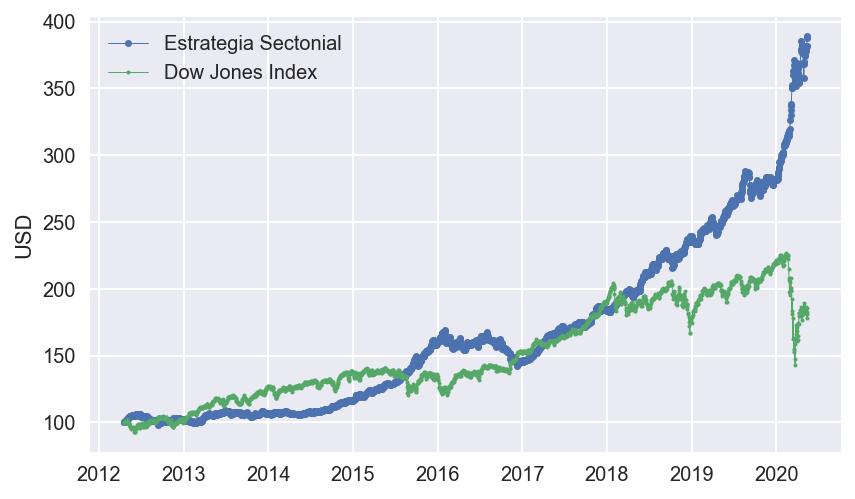

In [25]:
fig, ax = plt.subplots()
ax.plot(assets_df['Sectional'],
        marker='.', linestyle='-', linewidth=0.5, label='Estrategia Sectonial')
ax.plot(index_df['INDU_Rent'],
        marker='o', markersize=2, linestyle='-',linewidth=0.5, label='Dow Jones Index')
ax.set_ylabel('USD')
ax.legend();

### Estrategia Contrarian

In [26]:
cont_df = mom_df.apply(lambda x: 10000000*x).astype(float).rank(axis=0,method='first',ascending=False).astype(int)
longWeight = 1
shortWeight = -1
longRank = 60
shortRank = 30
n = cont_df.iloc[:,0].max()
f = n-longRank
weights=dict(zip(cont_df.columns.to_list(),[2.5,2.5,15,20,25,35]))
cont_df.head(10).style.background_gradient(cmap='YlGnBu')

,Rentab 1M,Rentab 3M,Rentab 1Y,Rentab 2Y,Rentab 3Y,Rentab 5Y
NESN SW,126,24,47,70,76,108
ROG SW,96,15,11,60,107,105
NOVN SW,154,53,61,40,86,140
BATS LN,56,35,51,174,93,78
FP FP,41,111,139,42,147,120
RDSA LN,113,129,165,68,77,168
SAN FP,128,31,18,32,151,100
SIE GY,7,45,89,115,140,134
RDSB LN,137,138,168,67,90,169
BAYN GY,118,90,50,169,119,115


In [27]:
for col in cont_df.columns:
    cont_df[col] = np.where(cont_df[col]<=shortRank,shortWeight/shortRank, 
                           np.where(cont_df[col]>=f,longWeight/longRank,0))

In [28]:
cont_df.head(10).style.background_gradient(cmap='YlGnBu')

,Rentab 1M,Rentab 3M,Rentab 1Y,Rentab 2Y,Rentab 3Y,Rentab 5Y
NESN SW,0.0166667,-0.0333333,0,0,0,0
ROG SW,0,-0.0333333,-0.0333333,0,0,0
NOVN SW,0.0166667,0,0,0,0,0.0166667
BATS LN,0,0,0,0.0166667,0,0
FP FP,0,0,0.0166667,0,0.0166667,0.0166667
RDSA LN,0,0.0166667,0.0166667,0,0,0.0166667
SAN FP,0.0166667,0,-0.0333333,0,0.0166667,0
SIE GY,-0.0333333,0,0,0.0166667,0.0166667,0.0166667
RDSB LN,0.0166667,0.0166667,0.0166667,0,0,0.0166667
BAYN GY,0.0166667,0,0,0.0166667,0.0166667,0.0166667


In [29]:
#Producto con los pesos por cada variable
cont_df['Total'] = cont_df.assign(**weights).mul(cont_df).sum(1)
cont_df.head().style.background_gradient(cmap='YlGnBu')

,Rentab 1M,Rentab 3M,Rentab 1Y,Rentab 2Y,Rentab 3Y,Rentab 5Y,Total
NESN SW,0.0166667,-0.0333333,0,0,0,0,-0.0416667
ROG SW,0,-0.0333333,-0.0333333,0,0,0,-0.583333
NOVN SW,0.0166667,0,0,0,0,0.0166667,0.625
BATS LN,0,0,0,0.0166667,0,0,0.333333
FP FP,0,0,0.0166667,0,0.0166667,0.0166667,1.25


In [30]:
#Resultado
w_assets = cont_df['Total'].apply(lambda x:x/100).to_list()
w_assets=dict(zip(assets_df[ass_cols].columns.to_list(),w_assets))

In [31]:
df =assets_df[ass_cols]
assets_df['Contr_ret'] = df.assign(**w_assets).mul(df).sum(1)
assets_df[['Contr_ret']].head().style.background_gradient(cmap='YlGnBu')

,Contr_ret
2012-04-18 00:00:00,0
2012-04-19 00:00:00,-0.00197924
2012-04-20 00:00:00,0.00360387
2012-04-23 00:00:00,-0.00169006
2012-04-24 00:00:00,0.0048534


In [32]:
val = []
val.append(100)
for i in range(1,assets_df.shape[0]):
    val.append(val[i-1]*(1+assets_df['Contr_ret'].iloc[i]))
assets_df['Contrarian'] = val

In [33]:
assets_df[['Contr_ret','Contrarian']].head().style.background_gradient(cmap='YlGnBu')

,Contr_ret,Contrarian
2012-04-18 00:00:00,0,100
2012-04-19 00:00:00,-0.00197924,99.8021
2012-04-20 00:00:00,0.00360387,100.162
2012-04-23 00:00:00,-0.00169006,99.9925
2012-04-24 00:00:00,0.0048534,100.478


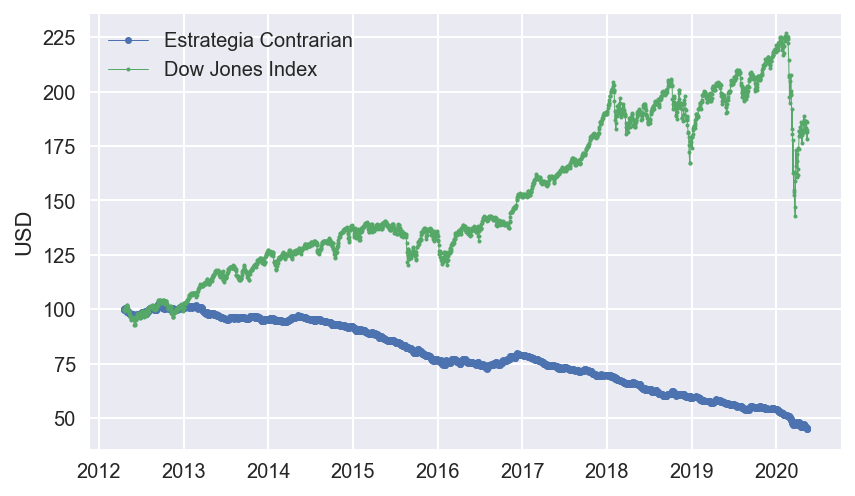

In [34]:
fig, ax = plt.subplots()
ax.plot(assets_df['Contrarian'],
marker='.', linestyle='-', linewidth=0.5, label='Estrategia Contrarian')
ax.plot(index_df['INDU_Rent'],
marker='o', markersize=2, linestyle='-',linewidth=0.5, label='Dow Jones Index')
ax.set_ylabel('USD')
ax.legend();

### Estrategia Ranking por ratios fundamentales

In [35]:
rat_df = ratios_df.fillna(0).rank(axis=0,method='first',ascending=False).astype(int)
longWeight = 2
shortWeight = -2
longRank = 30
shortRank = 60
n = rat_df.iloc[:,0].max()
f = n-longRank
weights=dict(zip(ratios_df.columns.to_list(),[40,25,5,25,5]))
rat_df.head(10).style.background_gradient(cmap='YlGnBu')

,PE_RATIO,PX_TO_BOOK_RATIO,PX_TO_CASH_FLOW,EPS_GROWTH,DVD_PAYOUT_RATIO
NESN SW,54,40,36,32,69
ROG SW,66,23,63,31,82
NOVN SW,42,59,61,158,36
BATS LN,122,129,87,106,41
FP FP,128,144,130,98,56
RDSA LN,115,153,146,137,33
SAN FP,18,100,62,146,18
SIE GY,91,102,79,110,67
RDSB LN,120,155,147,138,34
BAYN GY,69,126,82,19,25


In [36]:
for col in rat_df.columns:
    if col in ['EPS_GROWTH','DVD_PAYOUT_RATIO']:
        rat_df[col] = np.where(rat_df[col]<=longRank,longWeight/longRank, 
                           np.where(rat_df[col]>(n-shortRank),shortWeight/shortRank,0))
    else:
        rat_df[col] = np.where(rat_df[col]<=shortRank,shortWeight/shortRank, 
                           np.where(rat_df[col]>=(n-longRank),longWeight/longRank,0))

In [37]:
rat_df.head(10).style.background_gradient(cmap='YlGnBu')

,PE_RATIO,PX_TO_BOOK_RATIO,PX_TO_CASH_FLOW,EPS_GROWTH,DVD_PAYOUT_RATIO
NESN SW,-0.0333333,-0.0333333,-0.0333333,0,0
ROG SW,0,-0.0333333,0,0,0
NOVN SW,-0.0333333,-0.0333333,0,-0.0333333,0
BATS LN,0,0,0,0,0
FP FP,0,0,0,0,0
RDSA LN,0,0.0666667,0.0666667,-0.0333333,0
SAN FP,-0.0333333,0,0,-0.0333333,0.0666667
SIE GY,0,0,0,0,0
RDSB LN,0,0.0666667,0.0666667,-0.0333333,0
BAYN GY,0,0,0,0.0666667,0.0666667


In [38]:
df =assets_df[ass_cols]
rat_df['Total'] = rat_df.assign(**weights).mul(rat_df).sum(1)
rat_df.head().style.background_gradient(cmap='YlGnBu')

,PE_RATIO,PX_TO_BOOK_RATIO,PX_TO_CASH_FLOW,EPS_GROWTH,DVD_PAYOUT_RATIO,Total
NESN SW,-0.0333333,-0.0333333,-0.0333333,0,0,-2.33333
ROG SW,0,-0.0333333,0,0,0,-0.833333
NOVN SW,-0.0333333,-0.0333333,0,-0.0333333,0,-3
BATS LN,0,0,0,0,0,0
FP FP,0,0,0,0,0,0


In [39]:
#Resultado
w_assets = rat_df['Total'].apply(lambda x:x/100).to_list()
w_assets=dict(zip(assets_df[ass_cols].columns.to_list(),w_assets))

In [40]:
df =assets_df[ass_cols]
assets_df['Rate_ret'] = df.assign(**w_assets).mul(df).sum(1)

In [41]:
val = []
val.append(100)
for i in range(1,assets_df.shape[0]):
    val.append(val[i-1]*(1+assets_df['Rate_ret'].iloc[i]))
assets_df['Ratios'] = val

In [42]:
assets_df[['Rate_ret','Ratios']].head().style.background_gradient(cmap='YlGnBu')

,Rate_ret,Ratios
2012-04-18 00:00:00,0,100
2012-04-19 00:00:00,-0.0166069,98.3393
2012-04-20 00:00:00,0.00489022,98.8202
2012-04-23 00:00:00,-0.0166624,97.1736
2012-04-24 00:00:00,0.0152521,98.6557


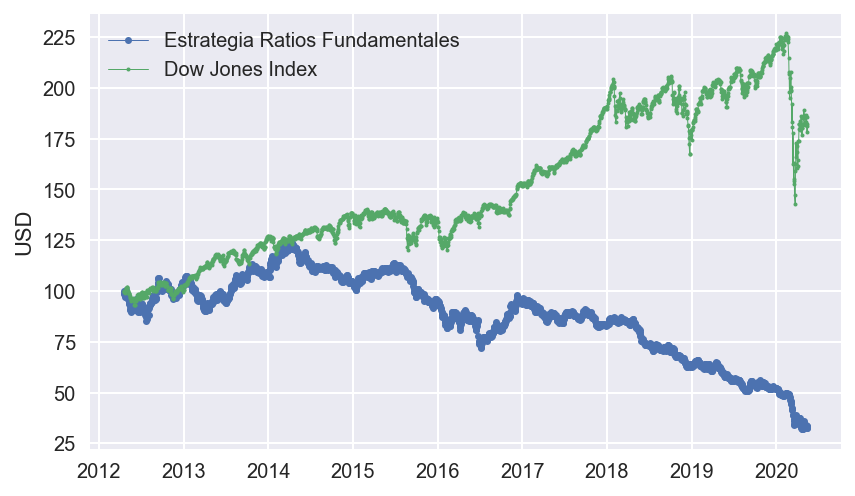

In [43]:
fig, ax = plt.subplots()
ax.plot(assets_df['Ratios'],
marker='.', linestyle='-', linewidth=0.5, label='Estrategia Ratios Fundamentales')
ax.plot(index_df['INDU_Rent'],
marker='o', markersize=2, linestyle='-',linewidth=0.5, label='Dow Jones Index')
ax.set_ylabel('USD')
ax.legend();

### Estrategia Ranking por preferencias de analistas

In [44]:
brk_df = brok_df.rank(axis=0,method='first',ascending=False).astype(int)
longWeight = 1
shortWeight = -1
longRank = 30
shortRank = 60
n = brk_df.iloc[:,0].max()
weights=dict(zip(brk_df.columns.to_list(),[100,0,0,0]))
brk_df.head(10).style.background_gradient(cmap='YlGnBu')

,EQY_REC_CONS,TOT_ANALYST_REC,TOT_BUY_REC,TOT_SELL_REC
NESN SW,95,19,52,49
ROG SW,34,64,25,68
NOVN SW,74,42,39,69
BATS LN,13,116,40,104
FP FP,2,54,9,142
RDSA LN,121,80,125,105
SAN FP,21,43,14,143
SIE GY,16,65,18,144
RDSB LN,111,162,142,106
BAYN GY,37,32,19,107


In [45]:
for col in brk_df.columns:
    brk_df[col] = np.where(brk_df[col]<=longRank,longWeight/longRank, 
                           np.where(brk_df[col]>(n-shortRank),shortWeight/shortRank,0))
brk_df.head(10).style.background_gradient(cmap='YlGnBu')

,EQY_REC_CONS,TOT_ANALYST_REC,TOT_BUY_REC,TOT_SELL_REC
NESN SW,0,0.0333333,0,0
ROG SW,0,0,0.0333333,0
NOVN SW,0,0,0,0
BATS LN,0.0333333,-0.0166667,0,0
FP FP,0.0333333,0,0.0333333,-0.0166667
RDSA LN,-0.0166667,0,-0.0166667,0
SAN FP,0.0333333,0,0.0333333,-0.0166667
SIE GY,0.0333333,0,0.0333333,-0.0166667
RDSB LN,0,-0.0166667,-0.0166667,0
BAYN GY,0,0,0.0333333,0


In [46]:
brk_df['Total'] = brk_df.assign(**weights).mul(brk_df).sum(1)
brk_df.head().style.background_gradient(cmap='YlGnBu')

,EQY_REC_CONS,TOT_ANALYST_REC,TOT_BUY_REC,TOT_SELL_REC,Total
NESN SW,0,0.0333333,0,0,0
ROG SW,0,0,0.0333333,0,0
NOVN SW,0,0,0,0,0
BATS LN,0.0333333,-0.0166667,0,0,3.33333
FP FP,0.0333333,0,0.0333333,-0.0166667,3.33333


In [47]:
#Resultado
w_assets = brk_df['Total'].apply(lambda x:x/100).to_list()
w_assets=dict(zip(assets_df[ass_cols].columns.to_list(),w_assets))

In [48]:
df =assets_df[ass_cols]
assets_df['Broker_ret'] = df.assign(**w_assets).mul(df).sum(1)

In [49]:
val = []
val.append(100)
for i in range(1,assets_df.shape[0]):
    val.append(val[i-1]*(1+assets_df['Broker_ret'].iloc[i]))
assets_df['Broker'] = val

In [50]:
assets_df[['Broker_ret','Broker']].head().style.background_gradient(cmap='YlGnBu')

,Broker_ret,Broker
2012-04-18 00:00:00,0,100
2012-04-19 00:00:00,-0.0105082,98.9492
2012-04-20 00:00:00,0.00225223,99.172
2012-04-23 00:00:00,0.00157556,99.3283
2012-04-24 00:00:00,0.00363446,99.6893


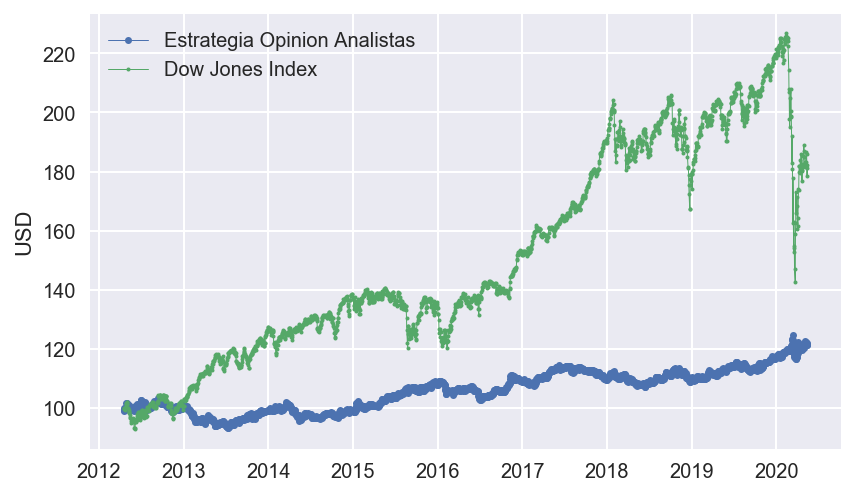

In [51]:
fig, ax = plt.subplots()
ax.plot(assets_df['Broker'],
marker='.', linestyle='-', linewidth=0.5, label='Estrategia Opinion Analistas')
ax.plot(index_df['INDU_Rent'],
marker='o', markersize=2, linestyle='-',linewidth=0.5, label='Dow Jones Index')
ax.set_ylabel('USD')
ax.legend();

### Estrategia Ranking por sentimientos

In [52]:
st_df = sent_df.rank(axis=0,method='first',ascending=False).astype(int)
longWeight = 1
shortWeight = -1
longRank = 30
shortRank = 60
n = st_df.iloc[:,0].max()
weights=dict(zip(st_df.columns.to_list(),[0,100]))
st_df.head(10).style.background_gradient(cmap='YlGnBu')

,TWITTER_SENTIMENT_REALTIME,NEWS_SENTIMENT_RT
NESN SW,12,9
ROG SW,13,72
NOVN SW,7,89
BATS LN,14,152
FP FP,15,99
RDSA LN,16,149
SAN FP,17,18
SIE GY,18,12
RDSB LN,19,150
BAYN GY,20,62


In [53]:
for col in st_df.columns:
    st_df[col] = np.where(st_df[col]<=longRank,longWeight/longRank, 
                           np.where(st_df[col]>(n-shortRank),shortWeight/shortRank,0))
st_df.head(10).style.background_gradient(cmap='YlGnBu')

,TWITTER_SENTIMENT_REALTIME,NEWS_SENTIMENT_RT
NESN SW,0.0333333,0.0333333
ROG SW,0.0333333,0
NOVN SW,0.0333333,0
BATS LN,0.0333333,-0.0166667
FP FP,0.0333333,0
RDSA LN,0.0333333,-0.0166667
SAN FP,0.0333333,0.0333333
SIE GY,0.0333333,0.0333333
RDSB LN,0.0333333,-0.0166667
BAYN GY,0.0333333,0


In [54]:
st_df['Total'] = st_df.assign(**weights).mul(st_df).sum(1)
st_df.head().style.background_gradient(cmap='YlGnBu')

,TWITTER_SENTIMENT_REALTIME,NEWS_SENTIMENT_RT,Total
NESN SW,0.0333333,0.0333333,3.33333
ROG SW,0.0333333,0,0
NOVN SW,0.0333333,0,0
BATS LN,0.0333333,-0.0166667,-1.66667
FP FP,0.0333333,0,0


In [55]:
#Resultado
w_assets = st_df['Total'].apply(lambda x:x/100).to_list()
w_assets=dict(zip(assets_df[ass_cols].columns.to_list(),w_assets))

In [56]:
df =assets_df[ass_cols]
assets_df['Sent_ret'] = df.assign(**w_assets).mul(df).sum(1)

In [57]:
val = []
val.append(100)
for i in range(1,assets_df.shape[0]):
    val.append(val[i-1]*(1+assets_df['Sent_ret'].iloc[i]))
assets_df['Sentiment'] = val

In [58]:
assets_df[['Sent_ret','Sentiment']].head().style.background_gradient(cmap='YlGnBu')

,Sent_ret,Sentiment
2012-04-18 00:00:00,0,100
2012-04-19 00:00:00,0.00316635,100.317
2012-04-20 00:00:00,-0.00189668,100.126
2012-04-23 00:00:00,0.00854938,100.982
2012-04-24 00:00:00,-0.00390499,100.588


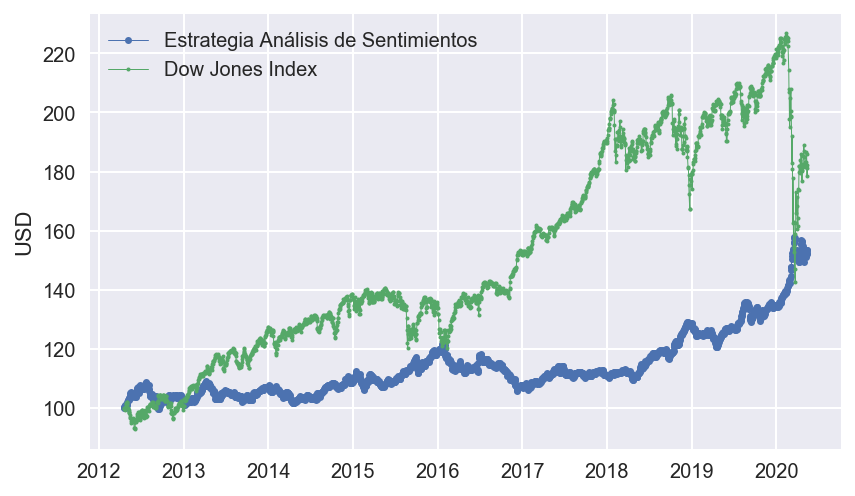

In [59]:
fig, ax = plt.subplots()
ax.plot(assets_df['Sentiment'],
marker='.', linestyle='-', linewidth=0.5, label='Estrategia Análisis de Sentimientos')
ax.plot(index_df['INDU_Rent'],
marker='o', markersize=2, linestyle='-',linewidth=0.5, label='Dow Jones Index')
ax.set_ylabel('USD')
ax.legend();

## Resumen de Activos

In [60]:
def risk_contribution(w,cov):
    """
    Compute the contributions to risk of the constituents of a portfolio, given a set of portfolio weights and a covariance matrix
    """
    total_portfolio_var = erk.portfolio_vol(w,cov)**2
    # Marginal contribution of each constituent
    marginal_contrib = cov@w
    risk_contrib = np.multiply(marginal_contrib,w.T)/total_portfolio_var
    return risk_contrib

def to_percent(x):
    try: f_string = '{:.2%}'.format(x)
    except: f_string = x
    return f_string

def to_decimal(x):
    try:
        if x >= 100:
            f_string = '{0:,.0f}'.format(x)
        elif x >= 10:
            f_string = '{0:,.1f}'.format(x)
        else:
            f_string = '{0:,.2f}'.format(x)
            
    except: f_string = x
    return f_string

def annual_volatility(df_single_returns):
    """
    Determines the annual volatility of a strategy.

    Parameters
    ----------
    df_single_returns : pd.Series or np.ndarray
        Periodic returns of the strategy, noncumulative.

    Returns
    -------
    float, np.ndarray
        Annual volatility.
    """

    if len(df_single_returns) < 2:
        return np.nan

    std = df_single_returns.std(ddof=1)

    volatility = std * (252 ** (1.0 / 2))

    return volatility.apply(to_percent)#.astype(np.float)
def var_pct(df_single_returns):
    """
    Determines the annual var of a strategy.

 

    Parameters
    ----------
    df_single_returns : pd.Series or np.ndarray
        Periodic returns of the strategy, noncumulative.

 

    Returns
    -------
    float, np.ndarray
        Annual var (%).
    """

 

    if len(df_single_returns) < 2:
        return np.nan

 

    std = df_single_returns.std(ddof=1)
    vol = std * (252 ** (1.0 / 2))
    t=252
    ci=0.95


    var =  vol*scs.norm.cdf(scs.norm.ppf(1-ci))/np.sqrt(t) #scs.norm.ppf(1-ci, mean, vol) * np.sqrt(t)
    return var.astype(np.float)

def max_drawdown(df_returns):
    max_dd = (np.cumprod(1+df_returns)/np.maximum.accumulate(np.cumprod(1+df_returns))-1).min()
    return max_dd

def cal_max_dd(df_single_return):
    """
    Determines the maximum drawdown of a strategy.

    Parameters
    ----------
    df_single_return :
        Daily returns of the strategy, noncumulative.

    Returns
    ----------
    float
        Maximum drawdown.
    """
    if len(df_single_return) < 1:
        return np.nan

    df_perform_equity_curve = (1. + df_single_return).cumprod()
    df_perform_cum_max = df_perform_equity_curve.cummax()
    # drawdown series
    df_perform_drawdown = df_perform_equity_curve / df_perform_cum_max - 1
    max_dd = df_perform_drawdown.min()
    return max_dd

def annual_return(df_single_return, period):
    """Determines the mean annual growth rate of returns.

    Parameters
    ----------
    df_single_return : pd.Series or np.ndarray
        Periodic returns of the strategy, noncumulative.
    period : str, optional
        Defines the periodicity of the 'returns' data for purposes of
        annualizing. Value ignored if `annualization` parameter is specified.
        Defaults are:
            'monthly':12
            'weekly': 52
            'daily': 252

    Returns
    -------
    float
    """

    if len(df_single_return) < 1:
        return np.nan

    num_years = float(len(df_single_return)) / period

    # Pass array to ensure index -1 looks up successfully.
    df_cum = (df_single_return + 1).cumprod(axis=0) - 1
    f_annual_return = (1. + df_cum.iloc[-1,:]) ** (1. / num_years) - 1

    return f_annual_return.apply(to_percent)

def linreg(x,y):
    # We add a constant so that we can also fit an intercept (alpha) to the model
    # This just adds a column of 1s to our data
    x = sm.add_constant(x)
    model = regression.linear_model.OLS(y,x).fit()
    # Remove the constant now that we're done
    x = x[:, 1]
    return model.params[0], model.params[1]

def to_summary(df_returns, df_y=index_df,start='2012-04-19',col_y='INDU return'):
    
    # Daily return calcs
    df_summary = pd.DataFrame(columns=df_returns.columns)
    df_summary.loc['Summary Stats:'] = ''
    MOIC = np.prod(1+df_returns)
    CAGR = MOIC**(periodicity/len(df_returns))-1
    df_summary.loc['Annualized Return'] = annual_return(df_returns, 252)
    df_summary.loc['Sharpe'] = CAGR/(np.std(df_returns)*np.sqrt(periodicity))
    df_summary.loc['Volatility'] = annual_volatility(df_returns) 
    df_summary.loc['VaR'] = var_pct(df_returns).apply(to_percent)

    df_summary.loc['Sortino'] = CAGR/(np.std(np.clip(df_returns, a_max=0, a_min=None))*np.sqrt(periodicity))
    df_summary.loc['Max Drawdown'] = cal_max_dd(df_returns).apply(to_percent)
    #Alpha y Beta
    Y=df_y.loc[start:,col_y].values
    for col in df_returns.columns:
        X=df_returns.loc[start:,col].values
        alpha, beta = linreg(X,Y)
        df_summary.loc['Alpha',col]=to_percent(alpha)
        df_summary.loc['Beta',col]=to_percent(beta)
    
    df_summary = df_summary.applymap(to_decimal)
    
    # Monthly return calcs
    df_summary.loc['Monthly Perf. Metrics:'] = ''
    df_months = pd.DataFrame(columns=df_returns.columns)
    df_returnsM = (1+df_returns).resample('M').prod()-1
    MOIC_M = np.prod(1+df_returnsM)
    CAGR_M = MOIC_M**(12/len(df_returnsM))-1
    df_months.loc['Sharpe'] = CAGR_M/(np.std(df_returnsM)*np.sqrt(12))
    df_months.loc['Sortino'] = CAGR_M/(np.std(np.clip(df_returnsM, a_max=0, a_min=None))*np.sqrt(12))
    
    if len(df_returnsM) >= 36: df_months.loc['Calmar'] = -(np.prod(1+df_returnsM.iloc[-12*3:])**(1/3)-1)\
                                                         / max_drawdown(df_returnsM.iloc[-12*3:])
    
    df_months = df_months.applymap(to_decimal)
    df_summary = df_summary.append(df_months)
    
    # Annuals
    df_summary.loc['Annual Returns:'] = ''
    df_annuals = df_returns.groupby(df_returns.index.year).apply(lambda x: np.prod(1+x)-1).applymap(to_percent)
    df_summary = df_summary.append(df_annuals)

    # Drawdowns
    df_summary.loc['Annual Max DD:'] = ''    
    df_maxdd = df_returns.groupby(df_returns.index.year).apply(cal_max_dd).applymap(to_percent)
    df_summary = df_summary.append(df_maxdd)
    return df_summary

In [61]:
returns = assets_df[['Sect_ret', 'Contr_ret', 'Rate_ret', 'Broker_ret', 'Sent_ret']]
returns.head().style.background_gradient(cmap='YlGnBu')

,Sect_ret,Contr_ret,Rate_ret,Broker_ret,Sent_ret
2012-04-18 00:00:00,0,0,0,0,0
2012-04-19 00:00:00,0.00567397,-0.00197924,-0.0166069,-0.0105082,0.00316635
2012-04-20 00:00:00,-0.00214867,0.00360387,0.00489022,0.00225223,-0.00189668
2012-04-23 00:00:00,0.00338008,-0.00169006,-0.0166624,0.00157556,0.00854938
2012-04-24 00:00:00,-0.0051083,0.0048534,0.0152521,0.00363446,-0.00390499


In [62]:
lookback = 21*6
corr_lookback = 21*24
periodicity = 252
num_portfolios = 25000
risk_free_rate = 0.0178
returns.fillna(0, inplace=True)
mean_returns = returns.mean()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [63]:
to_summary(returns)

,Sect_ret,Contr_ret,Rate_ret,Broker_ret,Sent_ret
Summary Stats:,,,,,
Annualized Return,17.60%,-9.09%,-12.57%,2.38%,5.26%
Sharpe,2.10,-1.86,-0.79,0.41,0.79
Volatility,8.40%,4.89%,15.97%,5.75%,6.63%
VaR,0.03%,0.02%,0.05%,0.02%,0.02%
Sortino,3.66,-2.88,-1.23,0.70,1.34
Max Drawdown,-16.00%,-55.95%,-74.12%,-9.95%,-13.29%
Alpha,0.05%,0.05%,0.05%,0.03%,0.05%
Beta,-28.19%,33.11%,26.22%,84.90%,-74.31%
Monthly Perf. Metrics:,,,,,


## Rendimiento de la Cartera

In [64]:
data=data_df[['Name','Currency','Sector', 'Country']]

In [65]:
#Pesos por modelo
model_weights = [.35,.15,.35,.075,.075]
#Sectional
data= data.join(sect_df[['Rentab 1M','Total']], how='inner')
data.drop(['Rentab 1M'], axis=1, inplace=True)
data.columns=['Name','Currency','Sector', 'Country','Sectional_rt']

In [66]:
#Contrarian
data= data.join(cont_df[['Rentab 1M','Total']], how='inner')
data.drop(['Rentab 1M'], axis=1, inplace=True)
data.columns=['Name','Currency','Sector', 'Country','Sectional_rt', 'Contrarian_rt']

In [67]:
#Ratios
data= data.join(rat_df[['PE_RATIO','Total']], how='inner')
data.drop(['PE_RATIO'], axis=1, inplace=True)
data.columns=['Name','Currency','Sector', 'Country','Sectional_rt','Contrarian_rt','Ratios_rt']

In [68]:
#Brokers
data= data.join(brk_df[['TOT_ANALYST_REC','Total']], how='inner')
data.drop(['TOT_ANALYST_REC'], axis=1, inplace=True)
data.columns=['Name','Currency','Sector', 'Country','Sectional_rt', 'Contrarian_rt','Ratios_rt','Broker_rt']

In [69]:
#Sentiment
data= data.join(st_df[['NEWS_SENTIMENT_RT','Total']], how='inner')
data.drop(['NEWS_SENTIMENT_RT'], axis=1, inplace=True)
data.columns=['Name','Currency','Sector','Country','Sectional_rt', 'Contrarian_rt','Ratios_rt','Broker_rt','Sentiment_rt']

In [70]:
cols =['Sectional_rt', 'Contrarian_rt','Ratios_rt','Broker_rt','Sentiment_rt']
w_model=dict(zip(data[cols].columns.to_list(),model_weights))
w_model

{'Sectional_rt': 0.35,
 'Contrarian_rt': 0.15,
 'Ratios_rt': 0.35,
 'Broker_rt': 0.075,
 'Sentiment_rt': 0.075}

In [71]:
df = data[cols].apply(lambda x: x/100)
data['Weight'] = df.assign(**w_model).mul(df).sum(1)
data.head()

,Name,Currency,Sector,Country,Sectional_rt,Contrarian_rt,Ratios_rt,Broker_rt,Sentiment_rt,Weight
NESN SW,NESTLE SA-REG,CHF,Food,SWITZERLAND,0.7,-0.041667,-2.333333,0.000000,3.333333,-0.003279
ROG SW,ROCHE HOLDING AG-GENUSSCHEIN,CHF,Pharmaceuticals,SWITZERLAND,0.7,-0.583333,-0.833333,0.000000,0.000000,-0.001342
NOVN SW,NOVARTIS AG-REG,CHF,Pharmaceuticals,SWITZERLAND,-0.7,0.625000,-3.000000,0.000000,0.000000,-0.012012
BATS LN,BRITISH AMERICAN TOBACCO PLC,GBp,Agriculture,BRITAIN,-0.7,0.333333,0.000000,3.333333,-1.666667,-0.000700
FP FP,TOTAL SA,EUR,Oil&Gas,FRANCE,-0.7,1.250000,0.000000,3.333333,0.000000,0.001925


In [72]:
#Resultado
w_assets = dict(data['Weight'])

In [73]:
assets_df.fillna(0, inplace=True)

In [74]:
df=assets_df[ass_cols].fillna(0)
assets_df['Portfolio_ret'] = df.assign(**w_assets).mul(df).sum(1)
assets_df.head().style.background_gradient(cmap='YlGnBu')

In [75]:
val = []
val.append(100)
for i in range(1,assets_df.shape[0]):
    val.append(val[i-1]*(1+assets_df['Portfolio_ret'].iloc[i]))
assets_df['Portfolio'] = val

In [76]:
assets_df.head()

,NESN SW,ROG SW,NOVN SW,BATS LN,FP FP,RDSA LN,SAN FP,SIE GY,RDSB LN,BAYN GY,...,Contr_ret,Contrarian,Rate_ret,Ratios,Broker_ret,Broker,Sent_ret,Sentiment,Portfolio_ret,Portfolio
2012-04-18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,100.000000,0.000000,100.000000,0.000000,100.000000,0.000000,100.000000,0.000000,100.000000
2012-04-19,0.009709,0.009208,0.004909,0.010183,-0.026393,-0.014624,-0.008356,-0.017987,-0.011322,-0.002476,...,-0.001979,99.802076,-0.016607,98.339309,-0.010508,98.949175,0.003166,100.316635,-0.004674,99.532594
2012-04-20,-0.001748,0.026156,0.004885,0.006203,0.003165,0.006596,0.015956,0.011729,0.008933,0.025365,...,0.003604,100.161749,0.004890,98.820210,0.002252,99.172032,-0.001897,100.126366,0.001527,99.684559
2012-04-23,-0.028021,-0.014819,-0.005745,-0.009402,-0.024417,-0.012403,-0.019411,-0.025186,-0.010443,-0.043915,...,-0.001690,99.992469,-0.016662,97.173631,0.001576,99.328283,0.008549,100.982384,-0.004143,99.271572
2012-04-24,0.000000,0.001805,-0.014889,-0.017582,0.009843,0.009479,0.018355,0.013210,0.009635,0.014025,...,0.004853,100.477772,0.015252,98.655734,0.003634,99.689287,-0.003905,100.588049,0.004258,99.694276


In [77]:
to_summary(assets_df[['Portfolio_ret']])

,Portfolio_ret
Summary Stats:,
Annualized Return,0.64%
Sharpe,0.15
Volatility,4.15%
VaR,0.01%
Sortino,0.25
Max Drawdown,-11.27%
Alpha,0.03%
Beta,100.32%
Monthly Perf. Metrics:,


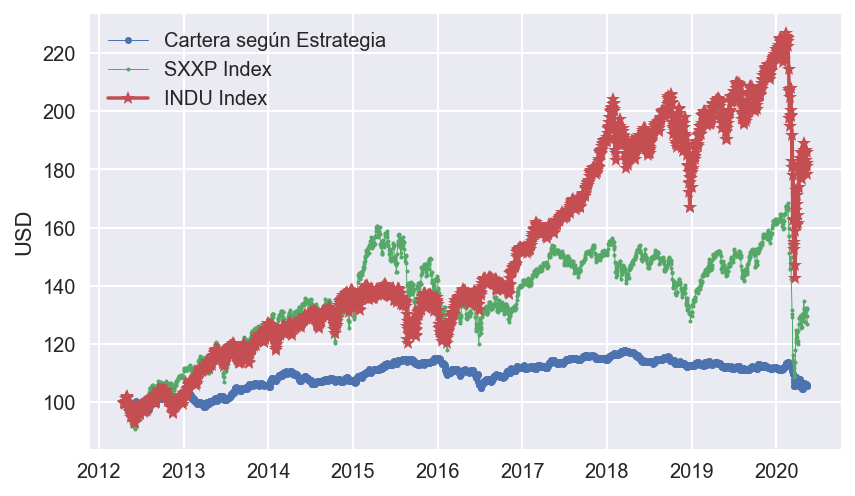

In [78]:
fig, ax = plt.subplots()
ax.plot(assets_df['Portfolio'],
        marker='.', linestyle='-', linewidth=0.5, label='Cartera según Estrategia')
ax.plot(index_df['SXXP_Rent'],
        marker='o', markersize=2, linestyle='-',linewidth=0.5, label='SXXP Index')
ax.plot(index_df['INDU_Rent'],
        marker='*', linestyle='-', label='INDU Index')
ax.set_ylabel('USD')
ax.legend();

## Correlaciones

In [79]:
index_df.columns

Index(['SXXP Index', 'INDU Index', 'SX5E Index', 'SXXP return', 'INDU return',
       'SX5E return', 'SXXP_Rent', 'INDU_Rent', 'SX5E_Rent'],
      dtype='object')

In [80]:
returns[['INDU_ret']]=index_df[['INDU return']]
returns[['SXXP_ret']]=index_df[['SXXP return']]
returns[['SX5E_ret']]=index_df[['SX5E return']]
returns.fillna(0, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [86]:
returns.head().style.background_gradient(cmap='YlGnBu')

,Sect_ret,Contr_ret,Rate_ret,Broker_ret,Sent_ret,INDU_ret,SXXP_ret,SX5E_ret
2012-04-18 00:00:00,0,0,0,0,0,0,0,0
2012-04-19 00:00:00,0.00567397,-0.00197924,-0.0166069,-0.0105082,0.00316635,-0.0052675,-0.0046564,-0.0185451
2012-04-20 00:00:00,-0.00214867,0.00360387,0.00489022,0.00225223,-0.00189668,0.00502619,0.00499006,0.0116428
2012-04-23 00:00:00,0.00338008,-0.00169006,-0.0166624,0.00157556,0.00854938,-0.00783544,-0.0234299,-0.0287461
2012-04-24 00:00:00,-0.0051083,0.0048534,0.0152521,0.00363446,-0.00390499,0.00575455,0.0104071,0.0174846


### Matriz de Covarianza

In [82]:
returns.cov().style.background_gradient(cmap='YlGnBu')

,Sect_ret,Contr_ret,Rate_ret,Broker_ret,Sent_ret,INDU_ret,SXXP_ret,SX5E_ret
Sect_ret,2.7975e-05,-1.52064e-05,-3.88161e-05,-2.36967e-07,1.50818e-05,-7.88604e-06,-1.73965e-05,-2.16563e-05
Contr_ret,-1.52064e-05,9.47103e-06,2.18187e-05,-2.15856e-07,-8.00259e-06,3.13617e-06,1.17997e-05,1.52179e-05
Rate_ret,-3.88161e-05,2.18187e-05,0.00010119,7.58197e-06,-2.96167e-05,2.65322e-05,5.49434e-05,7.04437e-05
Broker_ret,-2.36967e-07,-2.15856e-07,7.58197e-06,1.31149e-05,5.8526e-07,1.11347e-05,4.74262e-06,9.40541e-06
Sent_ret,1.50818e-05,-8.00259e-06,-2.96167e-05,5.8526e-07,1.74645e-05,-1.29783e-05,-1.51677e-05,-1.78388e-05
INDU_ret,-7.88604e-06,3.13617e-06,2.65322e-05,1.11347e-05,-1.29783e-05,0.000110397,6.52194e-05,7.52101e-05
SXXP_ret,-1.73965e-05,1.17997e-05,5.49434e-05,4.74262e-06,-1.51677e-05,6.52194e-05,0.000103622,0.000117642
SX5E_ret,-2.16563e-05,1.52179e-05,7.04437e-05,9.40541e-06,-1.78388e-05,7.52101e-05,0.000117642,0.000144538


### Matriz de Correlación

In [83]:
returns.corr().style.background_gradient(cmap='YlGnBu')

,Sect_ret,Contr_ret,Rate_ret,Broker_ret,Sent_ret,INDU_ret,SXXP_ret,SX5E_ret
Sect_ret,1,-0.934207,-0.729555,-0.0123714,0.682325,-0.141904,-0.32311,-0.340571
Contr_ret,-0.934207,1,0.704791,-0.0193679,-0.622235,0.096989,0.376657,0.411306
Rate_ret,-0.729555,0.704791,1,0.208128,-0.704514,0.25103,0.536562,0.58248
Broker_ret,-0.0123714,-0.0193679,0.208128,1,0.0386713,0.292629,0.12865,0.216025
Sent_ret,0.682325,-0.622235,-0.704514,0.0386713,1,-0.29557,-0.356547,-0.355056
INDU_ret,-0.141904,0.096989,0.25103,0.292629,-0.29557,1,0.609778,0.595396
SXXP_ret,-0.32311,0.376657,0.536562,0.12865,-0.356547,0.609778,1,0.961269
SX5E_ret,-0.340571,0.411306,0.58248,0.216025,-0.355056,0.595396,0.961269,1


## Conclusiones
- Dadas las estrategias realizadas, consideramos óptima, desde el punto de vista de la rentabilidad, la cross-sectional. Sin embargo, para un cliente con una aversión del riesgo elevada, propondríamos la estrategia del analista, que ofrece una volatilidad más reducida (no consideramos la Contrarian por tener una rentabilidad anualizada negativa), si bien su rentabilidad es, también, menor.
- Dado los resultados obtenidos, la estrategia relacionada a los Ratios Fundamentales es la menos recomendada.
- La cartera resultante de las estrategias analizadas es más estable que los indicadores del mercado en comparación a rentabilidad y volatilidad.

# Bibliografía

- Blog Quantoisseur (https://quantoisseur.com/2019/10/08/building-a-basic-cross-sectional-momentum-strategy-python-tutorial/)

- Blog Medium de Sam Chakerian (https://medium.com/automation-generation/easily-visualize-the-correlation-of-your-portfolio-in-python-alpaca-api-6c381274bcbd)

- Blog Quantopian (https://www.quantopian.com/posts/long-slash-short-cross-sectional-momentum)
